<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/Actividad_Semanal_6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal 6 - Visualización**

# **Cargar datos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

##**Descripción de la base de datos**

Esta investigación empleó una variable binaria, pago por defecto **(Sí = 1, No = 0**), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes **23 variables** como variables explicativas:

*   **X1**: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

*   **X2**: Género (1 = masculino; 2 = femenino).

*   **X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros)

*   **X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros).

*   **X5**: Edad (año).

*   **X6 - X11**: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:

    *   **X6** = el estado de pago en septiembre de 2005;
    *   **X7** = el estado de pago en agosto de 2005;
    *   **X11** = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

*  **X12-X17**: Importe del estado de cuenta (dólar NT).  

    *   **X12** = monto del estado de cuenta en septiembre de 2005;
    *   **X13** = monto del estado de cuenta en agosto de 2005;
    *   **X17** = monto del estado de cuenta en abril de 2005.

*   **X18-X23**: Monto del pago anterior (dólar NT).

    *   **X18** = monto pagado en septiembre de 2005;
    *   **X19** = monto pagado en agosto de 2005;
    *   **X23** = monto pagado en abril de 2005. 

# **Limpieza de datos**

Base de datos (DataFrame):

In [3]:
df_pca = pd.read_csv(input)
df_pca

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [4]:
df_pca.shape

(30000, 25)

In [5]:
print(df_pca.describe)

<bound method NDFrame.describe of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16   

El contendio de nuestro dataset es de de 29958 datos en 25 columnas.

#Renombramos las columnas

In [6]:
df_pca.rename(columns = {"X1": "Monto", "X2": "Genero", "X3": "Educacion", "X4" : "Estado_Civil", "X5" : "Edad",
                     "X6": "PAG_SEP", "X7": "PAG_AGO", "X8":"PAG_JUL", "X9": "PAG_JUN", "X10":"PAG_MAY", "X11": "AMORT.ABR", "X12": "ESTCTA_SEP", "X13": "ESTCTA_AGO", "X14": "ESTCTA_JUL", "X15":"ESTCTA_JUN",
                     "X16": "ESTCTA_MAY", "X17":"ESTCTA_ABR", "X18":"MP_SEP", "X19":"MP_AGO", "X20":"MP_JUL", "X21":"MP_JUN", "X22":"MP_MAY", "X23":"MP_ABR", "Y":"Var_Sal"}, inplace = True)


# Nos llevamos todos los valores vacíos

In [7]:
#Reemplazamos campos vacíos por 0 y dejamos 10 filas como muestra para trabajar
df_pca.dropna(axis = 0, inplace=True)
df_pca.head()

,ID,Monto,Genero,Educacion,Estado_Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,...,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,Var_Sal
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Información de los datos

In [8]:
#Información de las columnas
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29958 non-null  int64  
 1   Monto         29958 non-null  int64  
 2   Genero        29958 non-null  float64
 3   Educacion     29958 non-null  float64
 4   Estado_Civil  29958 non-null  float64
 5   Edad          29958 non-null  float64
 6   PAG_SEP       29958 non-null  float64
 7   PAG_AGO       29958 non-null  float64
 8   PAG_JUL       29958 non-null  float64
 9   PAG_JUN       29958 non-null  float64
 10  PAG_MAY       29958 non-null  float64
 11  AMORT.ABR     29958 non-null  float64
 12  ESTCTA_SEP    29958 non-null  float64
 13  ESTCTA_AGO    29958 non-null  float64
 14  ESTCTA_JUL    29958 non-null  float64
 15  ESTCTA_JUN    29958 non-null  float64
 16  ESTCTA_MAY    29958 non-null  float64
 17  ESTCTA_ABR    29958 non-null  float64
 18  MP_SEP        29958 non-nu

In [9]:
X = df_pca.iloc[0:, 0:25]
y = df_pca.iloc[:, -1]

In [10]:
X.shape

(29958, 25)

In [11]:
y.shape

(29958,)

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [12]:
df_pca.isnull().sum()

ID              0
Monto           0
Genero          0
Educacion       0
Estado_Civil    0
Edad            0
PAG_SEP         0
PAG_AGO         0
PAG_JUL         0
PAG_JUN         0
PAG_MAY         0
AMORT.ABR       0
ESTCTA_SEP      0
ESTCTA_AGO      0
ESTCTA_JUL      0
ESTCTA_JUN      0
ESTCTA_MAY      0
ESTCTA_ABR      0
MP_SEP          0
MP_AGO          0
MP_JUL          0
MP_JUN          0
MP_MAY          0
MP_ABR          0
Var_Sal         0
dtype: int64

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [13]:
df_pca.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,29958.0,15005.550504,8654.547473,1.0,7516.25,15005.5,22497.75,30000.0
Monto,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Educacion,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Estado_Civil,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAG_SEP,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
PAG_AGO,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
PAG_JUL,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
PAG_JUN,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0


5. Realiza el conteo de las variables categóricas

In [14]:
df_cat = df_pca.drop(["ID", "Monto", "Edad", "ESTCTA_SEP", "ESTCTA_AGO", "ESTCTA_JUL", "ESTCTA_JUN", "ESTCTA_MAY", "ESTCTA_ABR", "MP_SEP", "MP_AGO", "MP_JUL", "MP_JUN", "MP_MAY", "MP_ABR"], axis = 1)
df_cat

,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
29995,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
29997,1.0,2.0,2.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0
29998,1.0,3.0,1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0


In [15]:
df_cat.corr()

,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
Genero,1.000000,0.014701,-0.031478,-0.057637,-0.070690,-0.065648,-0.059586,-0.054319,-0.043291,-0.039730
Educacion,0.014701,1.000000,-0.143431,0.105636,0.121632,0.114012,0.108640,0.097220,0.082077,0.028109
Estado_Civil,-0.031478,-0.143431,1.000000,0.019747,0.024052,0.032430,0.032826,0.035360,0.034191,-0.024544
PAG_SEP,-0.057637,0.105636,0.019747,1.000000,0.672290,0.574706,0.539384,0.509783,0.474809,0.324769
PAG_AGO,-0.070690,0.121632,0.024052,0.672290,1.000000,0.766857,0.662429,0.622990,0.575434,0.263761
PAG_JUL,-0.065648,0.114012,0.032430,0.574706,0.766857,1.000000,0.777245,0.686447,0.632396,0.235765
PAG_JUN,-0.059586,0.108640,0.032826,0.539384,0.662429,0.777245,1.000000,0.819655,0.716278,0.217037
PAG_MAY,-0.054319,0.097220,0.035360,0.509783,0.622990,0.686447,0.819655,1.000000,0.816660,0.204549
AMORT.ABR,-0.043291,0.082077,0.034191,0.474809,0.575434,0.632396,0.716278,0.816660,1.000000,0.186903
Var_Sal,-0.039730,0.028109,-0.024544,0.324769,0.263761,0.235765,0.217037,0.204549,0.186903,1.000000


6. Escalamos

In [16]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cat)

scaled[:5]

array([[ 0.8096885 ,  0.18584882, -1.05708615,  1.79464177,  1.78258329,
        -0.69667977, -0.66663037, -1.53070038, -1.48651337,  1.87668918],
       [ 0.8096885 ,  0.18584882,  0.85883054, -0.874468  ,  1.78258329,
         0.13943643,  0.18924143,  0.23563523,  1.99391629,  1.87668918],
       [ 0.8096885 ,  0.18584882,  0.85883054,  0.01523526,  0.11194994,
         0.13943643,  0.18924143,  0.23563523,  0.25370146, -0.53285329],
       [ 0.8096885 ,  0.18584882, -1.05708615,  0.01523526,  0.11194994,
         0.13943643,  0.18924143,  0.23563523,  0.25370146, -0.53285329],
       [-1.23504286,  0.18584882, -1.05708615, -0.874468  ,  0.11194994,
        -0.69667977,  0.18924143,  0.23563523,  0.25370146, -0.53285329]])

7. Reduce las dimensiones con PCA, si consideras necesario:
  - Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [17]:
scaled_df = pd.DataFrame(scaled, columns=df_cat.columns)
scaled_df.head()

,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
0,0.809689,0.185849,-1.057086,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,1.876689
1,0.809689,0.185849,0.858831,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,1.876689
2,0.809689,0.185849,0.858831,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.532853
3,0.809689,0.185849,-1.057086,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.532853
4,-1.235043,0.185849,-1.057086,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.532853


In [18]:
col_cat = ["Genero", "Educacion", "Estado_Civil", "PAG_SEP", "PAG_AGO", "PAG_JUL", "PAG_JUN", "PAG_MAY", "AMORT.ABR", "Var_Sal"]

summary = {
  "Varianzas": scaled_df[col_cat].var()[0:11],
  "Valor Min": scaled_df[col_cat].min()[0:11],
  "Valor Max": scaled_df[col_cat].max()[0:11]
}
#recuerda que la variable col_cat la definimos más arriba.
pd.DataFrame(summary, index = col_cat).transpose()

,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.235043,-2.344330,-2.973003,-1.764171,-1.558683,-1.532796,-1.522502,-1.530700,-1.486513,-0.532853
Valor Max,0.809689,5.246207,2.774747,7.132861,6.794483,6.828366,7.036216,7.300978,7.214561,1.876689


In [19]:
t_gen = df_cat.var().sum()

In [20]:
var_Genero = df_cat.Genero.var()

print('Varianza Total \t:',t_gen.round(2) )
print('Varianza Genero :', ((var_Genero/t_gen)*100).round(2),'%' )

Varianza Total 	: 9.4
Varianza Genero : 2.54 %


In [21]:
t_edu = df_cat.var().sum()

var_Educacion = df_cat.Educacion.var()

print('Varianza Total \t:', t_edu.round(2) )
print('Varianza Educación:', ((var_Educacion/t_edu)*100).round(2),'%' )

Varianza Total 	: 9.4
Varianza Educación: 6.64 %


In [22]:
t_ec = df_cat.var().sum()

var_Estado_Civil = df_cat.Estado_Civil.var()

print('Varianza Total \t:', t_ec.round(2) )
print('Varianza Educación:', ((var_Estado_Civil/t_ec)*100).round(2),'%' )

Varianza Total 	: 9.4
Varianza Educación: 2.9 %


In [23]:
df_varianza = PCA()
df_varianza.fit(df_cat.iloc[:, 1:].dropna(axis=0))
df_varianzaSummary= pd.DataFrame({'Standard deviation': np.sqrt(df_varianza.explained_variance_),
                             'Proportion of variance': df_varianza.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(df_varianza.explained_variance_ratio_)
                             })
df_varianzaSummary = df_varianzaSummary.transpose()
df_varianzaSummary

,0,1,2,3,4,5,6,7,8
Standard deviation,2.417504,0.962952,0.789000,0.739158,0.603139,0.517709,0.511845,0.423903,0.388373
Proportion of variance,0.637693,0.101178,0.067925,0.059615,0.039693,0.029245,0.028586,0.019607,0.016458
Cumulative proportion,0.637693,0.738871,0.806797,0.866411,0.906104,0.935349,0.963935,0.983542,1.000000


8. Elabora los histogramas de los atributos para visualizar su distribución

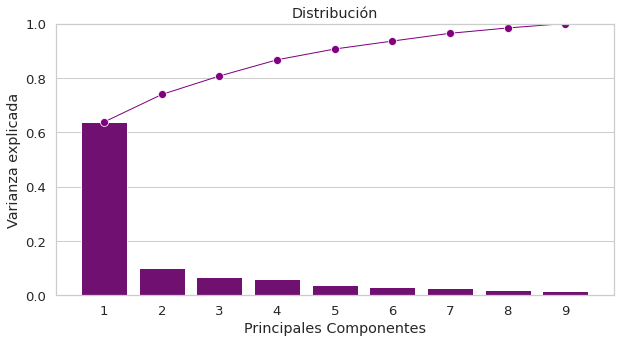

In [24]:
PC_components = np.arange(df_varianza.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.barplot(x = PC_components, 
                y = df_varianza.explained_variance_ratio_, 
                color = 'purple'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(df_varianza.explained_variance_ratio_), 
                 color = 'purple', 
                 linestyle = '-', 
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Distribución')
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

In [25]:
((df_varianzaSummary.iloc[2][2])*100).round(0)

81.0

In [26]:
((df_varianzaSummary.iloc[2][1])*100).round(2)

73.89

In [27]:
df_varianzaSummary.columns = ['PC{}'.format(i) for i in range(1, len(df_varianzaSummary.columns) + 1)]
df_varianzaSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,2.4175,0.9630,0.7890,0.7392,0.6031,0.5177,0.5118,0.4239,0.3884
Proportion of variance,0.6377,0.1012,0.0679,0.0596,0.0397,0.0292,0.0286,0.0196,0.0165
Cumulative proportion,0.6377,0.7389,0.8068,0.8664,0.9061,0.9353,0.9639,0.9835,1.0000


In [28]:
df_varianza.components_

array([[ 4.52232892e-02,  7.45277643e-03,  3.37634566e-01,
         4.21370721e-01,  4.37342145e-01,  4.33184529e-01,
         4.11858092e-01,  3.94205857e-01,  4.90570219e-02],
       [-9.48914660e-02,  1.91376816e-02, -6.06167356e-01,
        -4.31371534e-01, -1.12814609e-01,  2.34573637e-01,
         3.95704973e-01,  4.54540239e-01, -7.85360599e-02],
       [ 9.76147941e-01, -1.68350715e-01, -1.25303590e-01,
        -3.56646694e-02,  1.03520194e-02,  2.97521493e-02,
         1.03687170e-02, -1.56555992e-02, -2.18016901e-02],
       [-8.24322748e-02,  2.05144879e-02, -6.15437841e-01,
         2.71345918e-01,  5.73648239e-01,  1.73457023e-01,
        -1.88105344e-01, -3.76117497e-01, -6.62125303e-02],
       [-8.46519900e-03,  7.23486159e-03,  2.94259442e-01,
        -5.83026003e-01,  1.31480648e-01,  5.74176625e-01,
         5.82867384e-02, -4.70597556e-01,  3.92771769e-02],
       [-3.21077578e-02, -9.44583225e-02, -1.46222206e-01,
         4.56017898e-01, -6.16294078e-01,  3.242555

In [29]:
pcsComponents_df = pd.DataFrame(df_varianza.components_.transpose(), 
                                columns = df_varianzaSummary.columns,
                                index = df_cat.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Educacion,0.045223,-0.094891,0.976148,-0.082432,-0.008465,-0.032108,0.166931,0.000557,-0.017935
Estado_Civil,0.007453,0.019138,-0.168351,0.020514,0.007235,-0.094458,0.978422,0.007113,-0.066931
PAG_SEP,0.337635,-0.606167,-0.125304,-0.615438,0.294259,-0.146222,-0.006973,-0.024196,0.124482
PAG_AGO,0.421371,-0.431372,-0.035665,0.271346,-0.583026,0.456018,0.040913,0.109174,-0.000461
PAG_JUL,0.437342,-0.112815,0.010352,0.573648,0.131481,-0.616294,-0.068419,-0.253984,0.023039
PAG_JUN,0.433185,0.234574,0.029752,0.173457,0.574177,0.324256,0.015650,0.539480,-0.015813
PAG_MAY,0.411858,0.395705,0.010369,-0.188105,0.058287,0.349062,0.035060,-0.714968,0.025486
AMORT.ABR,0.394206,0.454540,-0.015656,-0.376117,-0.470598,-0.391968,-0.044565,0.344944,-0.014540
Var_Sal,0.049057,-0.078536,-0.021802,-0.066213,0.039277,-0.016426,-0.070427,-0.041627,-0.988970


- Preprocesamiento

In [42]:
pcsComponents_dfX = pd.DataFrame(df_varianza.components_.transpose(), 
                                columns = df_varianzaSummary.columns,
                                index = df_cat.iloc[:, 1:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Educacion,0.045223,-0.094891,0.976148,-0.082432,-0.008465,-0.032108,0.166931,0.000557,-0.017935
Estado_Civil,0.007453,0.019138,-0.168351,0.020514,0.007235,-0.094458,0.978422,0.007113,-0.066931
PAG_SEP,0.337635,-0.606167,-0.125304,-0.615438,0.294259,-0.146222,-0.006973,-0.024196,0.124482
PAG_AGO,0.421371,-0.431372,-0.035665,0.271346,-0.583026,0.456018,0.040913,0.109174,-0.000461
PAG_JUL,0.437342,-0.112815,0.010352,0.573648,0.131481,-0.616294,-0.068419,-0.253984,0.023039
PAG_JUN,0.433185,0.234574,0.029752,0.173457,0.574177,0.324256,0.015650,0.539480,-0.015813
PAG_MAY,0.411858,0.395705,0.010369,-0.188105,0.058287,0.349062,0.035060,-0.714968,0.025486
AMORT.ABR,0.394206,0.454540,-0.015656,-0.376117,-0.470598,-0.391968,-0.044565,0.344944,-0.014540
Var_Sal,0.049057,-0.078536,-0.021802,-0.066213,0.039277,-0.016426,-0.070427,-0.041627,-0.988970


In [43]:
df_varianzaSummary.iloc[:, 0:].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,2.417504,0.962952,0.789000,0.739158,0.603139,0.517709,0.511845,0.423903,0.388373
Proportion of variance,0.637693,0.101178,0.067925,0.059615,0.039693,0.029245,0.028586,0.019607,0.016458
Cumulative proportion,0.637693,0.738871,0.806797,0.866411,0.906104,0.935349,0.963935,0.983542,1.000000


In [44]:
pcs = PCA()
pcs.fit(preprocessing.scale(df_varianzaSummary.iloc[:, 0:].dropna(axis=0)))

PCA()

In [45]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3
Standard deviation,3.3262,1.5609,0.0
Proportion of variance,0.8195,0.1805,0.0
Cumulative proportion,0.8195,1.0000,1.0


In [46]:
pcsSummary_df.iloc[0,2]

3.5108334685767017e-16

- Decomposición

In [47]:
pcs = PCA()

In [48]:
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:10]

array([[-1.72302858e-01,  1.49113489e+00, -1.48784052e+00,
         2.63276136e+00,  3.88828599e-01, -2.09449421e+00,
        -8.77162657e-02, -4.33225072e-01,  8.57539041e-01,
         5.85898455e-01],
       [ 1.73615788e+00, -2.81357350e-01,  2.14223075e-01,
         1.33693645e+00,  6.65526002e-01,  1.42404322e+00,
         5.67128144e-01, -2.11660025e+00,  2.92377952e-01,
         8.32964191e-01],
       [ 2.90978572e-01, -3.87059345e-01,  1.12571486e+00,
        -5.43352591e-03,  6.26758137e-01, -4.72448362e-02,
        -4.48058768e-02, -2.64011826e-02,  7.51841261e-03,
         1.32988643e-04],
       [ 2.58103247e-01,  9.74011195e-01,  8.67282491e-01,
        -5.96003899e-02, -6.88884846e-01, -1.75288288e-01,
        -5.11101765e-02, -2.09984543e-02,  2.38454467e-03,
        -3.70649994e-03],
       [-3.14089559e-01,  5.02958274e-01, -6.07667736e-01,
        -1.40972766e+00, -8.89962039e-01,  5.28700196e-01,
        -6.80162366e-04, -3.32287312e-01,  6.35613392e-01,
         2.

• El % de la varianza explicada por cada componente

• El acumulado de la varianza explicada por cada componente

In [49]:
pcsSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.
                                                               explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(pcs.
                                                                explained_variance_ratio_) * 100})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,44.24,44.242380
1,11.51,55.751547
2,10.06,65.807939
3,9.53,75.342042
4,8.40,83.739498
5,6.31,90.049557
6,4.01,94.055894
7,2.65,96.708356
8,1.94,98.644510
9,1.36,100.000000


**Agregamos etiquetas**

In [50]:
#Lista de nombre de los componentes

pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,44.24,44.242380
PC2,11.51,55.751547
PC3,10.06,65.807939
PC4,9.53,75.342042
PC5,8.40,83.739498
PC6,6.31,90.049557
PC7,4.01,94.055894
PC8,2.65,96.708356
PC9,1.94,98.644510
PC10,1.36,100.000000


In [51]:
#colocamos valores de cada componente
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)

print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  10.000333811796908
Varianza total de los componentes:  10.000333811796907


In [52]:
total_var =scaled_df.var().sum()

pd.DataFrame({
  "Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Genero,10.0,10.0
Educacion,10.0,20.0
Estado_Civil,10.0,30.0
PAG_SEP,10.0,40.0
PAG_AGO,10.0,50.0
PAG_JUL,10.0,60.0
PAG_JUN,10.0,70.0
PAG_MAY,10.0,80.0
AMORT.ABR,10.0,90.0
Var_Sal,10.0,100.0


**Composición de cada componente arrojado por PCA**

In [53]:
comps_df = pd.DataFrame(
  pcs.components_.round(4), # pcs.components  = pesos de cada uno de los componentes
  columns = pcs_df.columns,
  index = scaled_df.columns) 
comps_df.iloc[:,:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Genero,-0.0429,0.0741,0.0172,0.3508,0.4021,0.4159,0.4231,0.4166,0.3925,0.1670
Educacion,0.2196,0.6569,-0.7104,0.0370,0.0150,-0.0131,-0.0324,-0.0480,-0.0544,0.0864
Estado_Civil,0.7775,-0.0021,0.1349,-0.1666,-0.0495,0.0400,0.1175,0.1555,0.1696,-0.5280
PAG_SEP,0.5840,-0.2945,0.0283,0.2108,0.0482,-0.0376,-0.1034,-0.1287,-0.1265,0.6929
PAG_AGO,0.0547,0.6778,0.6867,0.1124,0.0487,-0.0128,-0.0788,-0.1159,-0.1311,0.1185
PAG_JUL,-0.0336,0.1288,0.0668,-0.5555,-0.4255,-0.1687,0.1534,0.3313,0.3828,0.4241
PAG_JUN,0.0172,-0.0116,0.0033,-0.6207,0.2779,0.5581,0.1936,-0.1808,-0.3796,0.1062
PAG_MAY,-0.0000,-0.0048,-0.0028,0.2730,-0.5626,0.0818,0.5941,0.0990,-0.4887,-0.0236
AMORT.ABR,0.0056,-0.0066,0.0027,-0.1452,0.4858,-0.6166,0.2268,0.4019,-0.3868,0.0071
Var_Sal,-0.0015,-0.0000,0.0020,-0.0368,0.1415,-0.3110,0.5690,-0.6754,0.3192,0.0034


In [54]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard deviation,2.1034,1.0728,1.0028,0.9764,0.9164,0.7944,0.6330,0.5150,0.4400,0.3682
Proportion of variance,0.4424,0.1151,0.1006,0.0953,0.0840,0.0631,0.0401,0.0265,0.0194,0.0136
Cumulative proportion,0.4424,0.5575,0.6581,0.7534,0.8374,0.9005,0.9406,0.9671,0.9864,1.0000


In [58]:
comps_df.iloc[:,:5].abs().idxmax()

PC1    Estado_Civil
PC2         PAG_AGO
PC3       Educacion
PC4         PAG_JUN
PC5         PAG_MAY
dtype: object

In [57]:
comps_df.iloc[:,:10].abs().idxmax()

PC1     Estado_Civil
PC2          PAG_AGO
PC3        Educacion
PC4          PAG_JUN
PC5          PAG_MAY
PC6        AMORT.ABR
PC7          PAG_MAY
PC8          Var_Sal
PC9          PAG_MAY
PC10         PAG_SEP
dtype: object

In [61]:
comps_df.PC1.idxmax()

'Estado_Civil'

In [62]:
comps_df.PC2.idxmin()

'PAG_SEP'

In [64]:
comps_df.PC1.nsmallest(3)

Genero    -0.0429
PAG_JUL   -0.0336
Var_Sal   -0.0015
Name: PC1, dtype: float64

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

**Educación vs Género**